In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame({
    'X1': [1, 2, 3, 4],
    'X2': [2, 1, 2, 3],
    'y': [5, 6, 7, 10]
})

In [3]:
data

,X1,X2,y
0,1,2,5
1,2,1,6
2,3,2,7
3,4,3,10


In [4]:
X = data[['X1', 'X2']].values
y = data['y'].values

##### Model 1 ---> Mean

In [7]:
data['pred1'] = data['y'].mean()
data

,X1,X2,y,pred1
0,1,2,5,7.0
1,2,1,6,7.0
2,3,2,7,7.0
3,4,3,10,7.0


In [8]:
data['res1'] = data['y'] - data['pred1']
data

,X1,X2,y,pred1,res1
0,1,2,5,7.0,-2.0
1,2,1,6,7.0,-1.0
2,3,2,7,7.0,0.0
3,4,3,10,7.0,3.0


##### Model 2 ---> Decision Tree

In [10]:
# split by x2
left = data[data['X2'] < 2.5] # 2.5 value based on similarity scoring
right = data[data['X2'] >= 2.5]

In [11]:
left_value = left['res1'].mean()   # -1.5
right_value = right['res1'].mean() # 1.5

In [13]:
eta = 0.1
data['pred2'] = data['pred1']  # Start with pred1
data.loc[left.index, 'pred2'] += eta * left_value
data.loc[right.index, 'pred2'] += eta * right_value

In [14]:
data

,X1,X2,y,pred1,res1,pred2
0,1,2,5,7.0,-2.0,6.9
1,2,1,6,7.0,-1.0,6.9
2,3,2,7,7.0,0.0,6.9
3,4,3,10,7.0,3.0,7.3


In [16]:
data['res2'] = data['y'] - data['pred2']

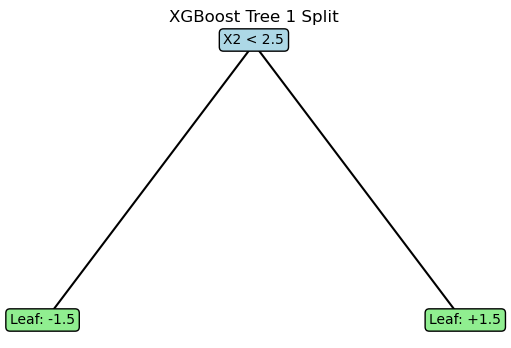

In [18]:
def plot_simple_tree():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot([0.5, 0.2], [0.9, 0.6], 'k-')
    ax.plot([0.5, 0.8], [0.9, 0.6], 'k-')
    ax.text(0.5, 0.9, "X2 < 2.5", ha='center', bbox=dict(boxstyle="round", facecolor='lightblue'))
    ax.text(0.2, 0.6, "Leaf: -1.5", ha='center', bbox=dict(boxstyle="round", facecolor='lightgreen'))
    ax.text(0.8, 0.6, "Leaf: +1.5", ha='center', bbox=dict(boxstyle="round", facecolor='lightgreen'))
    ax.axis('off')
    plt.title("XGBoost Tree 1 Split")
    plt.show()
plot_simple_tree()